# Machine Learning using Python : Time Series Analysis

#### Priyaranjan Mohanty

### First thing first , What is 'Time Series' ?

Time series is a sequence of observations recorded at regular time intervals.
Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

Or in other words ,

<b>Time series:</b> Commonly, a time series (x₁, …, xₑ) is assumed to be a sequence of real values taken at successive equally spaced⁶ points in time, from time t=1 to time t=e.

### Why do we need to analyze a time series?

Because it is the preparatory step before you develop a forecast of the series.
Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

### So what does analyzing a time series involve?

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

### Importing time series data into python

The data for a time series typically stores in .csv files or other spreadsheet formats and contains two columns: the date and the measured value.
Let’s use the read_csv() in pandas package to read the time series dataset (a csv file on Australian Drug Sales) as a pandas dataframe. Adding the parse_dates=['date'] argument will make the date column to be parsed as a date field.

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})



In [7]:
# Import as Dataframe
Aus_Drug_DF = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                          parse_dates=['date'],
                         index_col='date')

Aus_Drug_DF.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [8]:
Aus_Drug_DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
value    204 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
# Import as Dataframe
Aus_Drug_DF = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                          parse_dates=['date'],index_col='date')

Aus_Drug_DF.head()

### Visualizing TIme Series Data 

C:\Users\itzpr\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


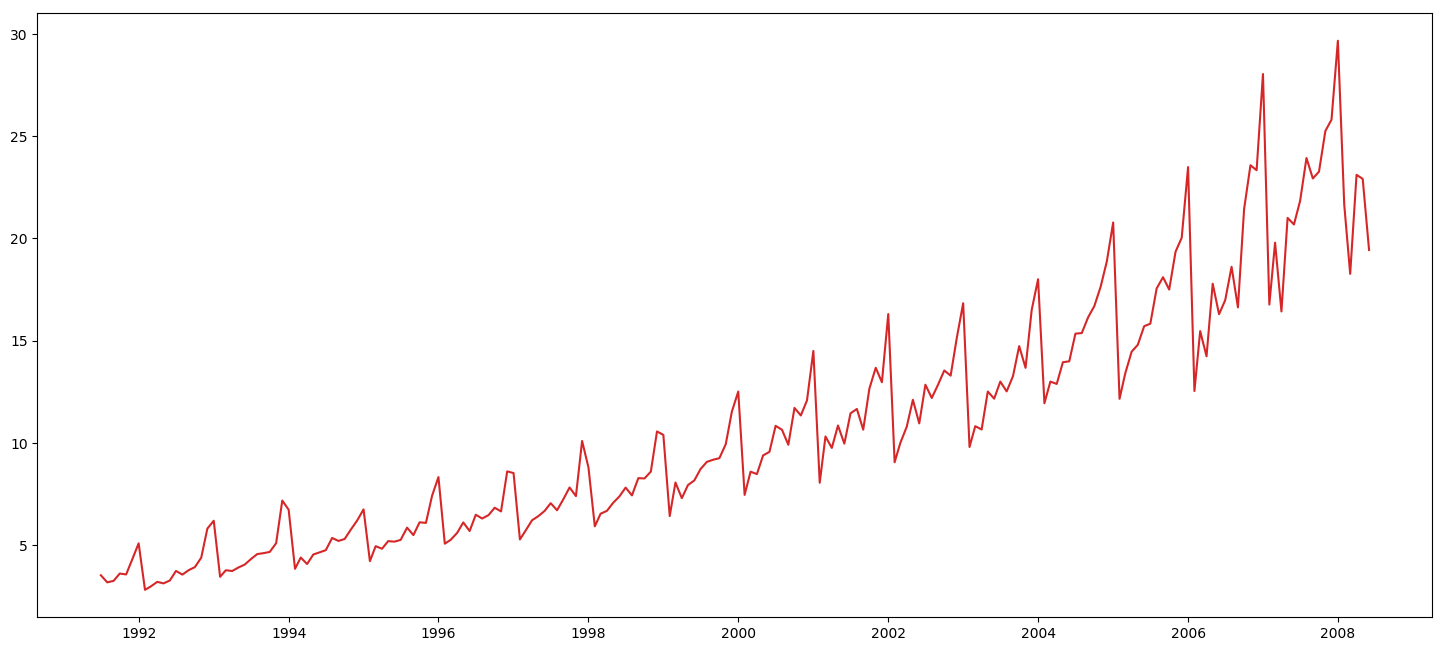

In [9]:
# Draw Plot
def plot_df( x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(18,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.show()

plot_df( x=Aus_Drug_DF.index, y=Aus_Drug_DF.value, 
        title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')  

### Patterns in a time series

Any time series may be split into the following components: 
        <b> Base Level + Trend + Seasonality + Error </b>
        
A trend is observed when there is an increasing or decreasing slope observed in the time series. 

Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

Another aspect to consider is the <b>cyclic</b> behaviour. 

It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. 

Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

### Seasonality in Python: additive or multiplicative

The analysis features of a Time Series are.

<b>Level:</b> is the average value in the series.
<b>Trend:</b> is the increasing or decreasing value in the series.
<b>Seasonality:</b> is the repeating the short-term cycle in the series.
<b>Noise:</b> is the random variation in the series.

There are basically two methods to analyze the seasonality of a Time Series: 

1) additive and 

2) multiplicative.

##### The Additive Model

Synthetically it is a model of data in which the effects of the individual factors are differentiated and added to model the data. It can be represented by:

        y(t) = Level + Trend + Seasonality + Noise

In the additive model, the behavior is linear where changes over time are consistently made by the same amount, like a linear trend. In this situation, the linear seasonality has the same amplitude and frequency.

#### The Multiplicative Model

In this situation, trend and seasonal components are multiplied and then added to the error component. It is not linear, can be exponential or quadratic and represented by a curved line as below:

        y(t) = Level * Trend * Seasonality * Noise

Different from the additive model, the multiplicative model has an increasing or decreasing amplitude and/or frequency over time.

Below charts can summarize much of this article. Note that the additive model does not vary in frequency and amplitude over time. The multiplicative model does, in this second model, the behavior acts as an increasing funnel (which may be decreasing).


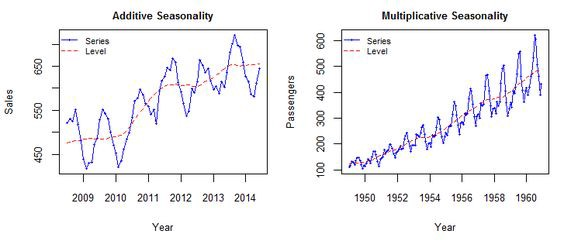

we use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. On other hand, in the additive model, the magnitude of seasonality does not change in relation to time.

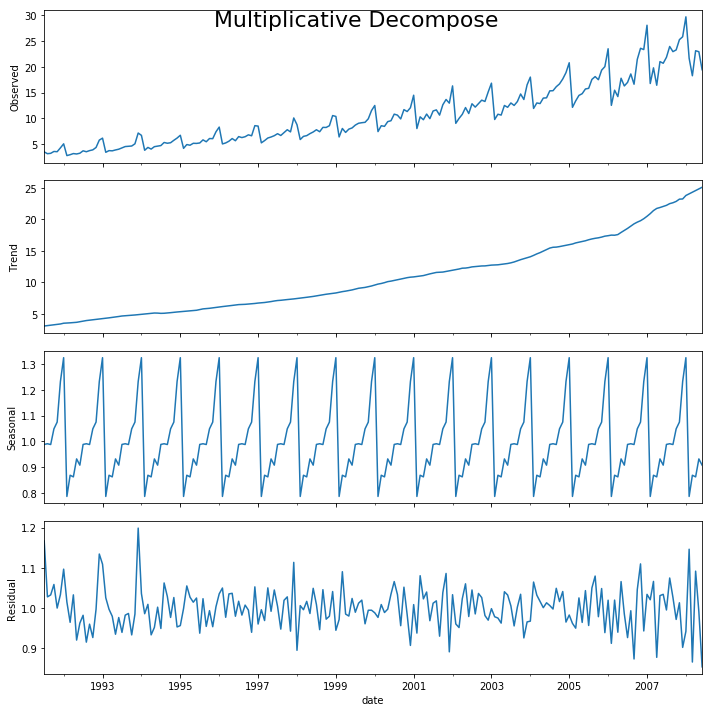

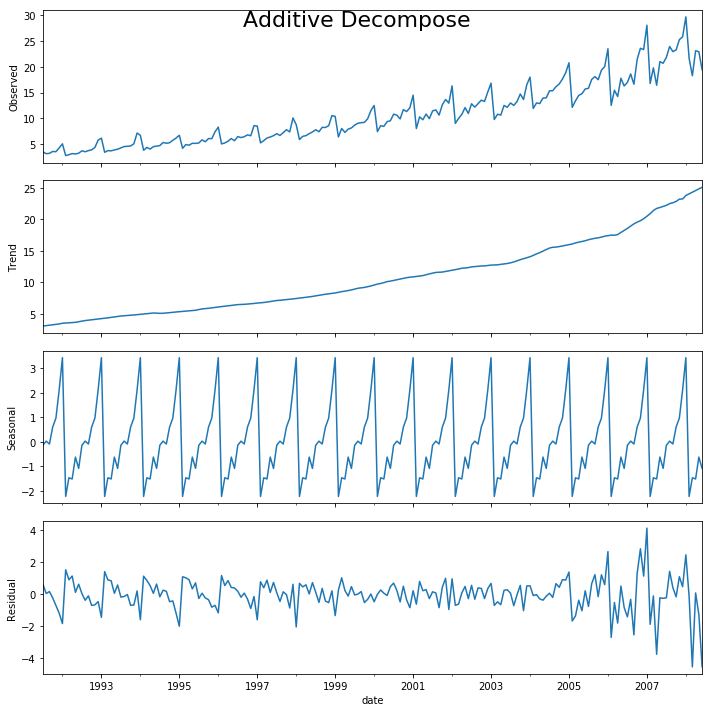

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(Aus_Drug_DF.value, model='multiplicative', 
                                extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(Aus_Drug_DF.value, model='additive', 
                                extrapolate_trend='freq')


# Setting extrapolate_trend='freq' takes care of any missing values in the trend and 
# residuals at the beginning of the series.


# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

### Let’s extract individual componnet of Time Series and put it in a dataframe

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. 

In [13]:
# Extract the Components -
# Actual Values = Product of (Seasonal * Trend * Resid)

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, 
                              result_mul.resid, result_mul.observed], 
                             axis=1)

df_reconstructed.columns = ['seasonal', 'trend', 'residual', 'actual_values']

df_reconstructed.head()

,seasonal,trend,residual,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [14]:
# If you check, the product of seas, trend and resid columns should exactly equal to the 
# actual_values.

0.987845 * 3.060085 * 1.166629

3.5265907491183826

### Stationary and Non-Stationary Time Series

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.


<b> NOTE : </b> it is possible to make nearly any time series stationary by applying a suitable transformation. Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

### Augmented Dickey-Fuller test



In [15]:
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
#X = series.values

result = adfuller(Aus_Drug_DF.value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

if the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.

In [16]:
from statsmodels.tsa.stattools import kpss

# KPSS Test
result = kpss(Aus_Drug_DF.value, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\itzpr\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### Detrending a time series

Detrending a time series is to remove the trend component from a time series.

Subtract the trend component obtained from time series decomposition

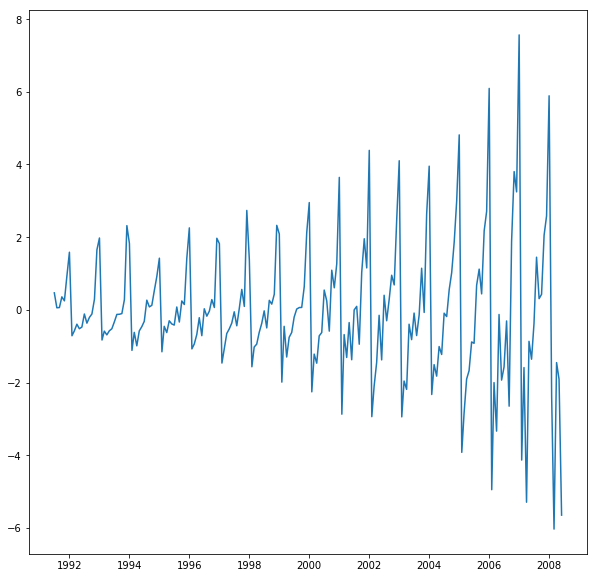

In [17]:

detrended = Aus_Drug_DF.value - result_mul.trend

plt.plot(detrended)


### Deseasonalize a time series

Divide the series by the seasonal index obtained from STL decomposition

[]

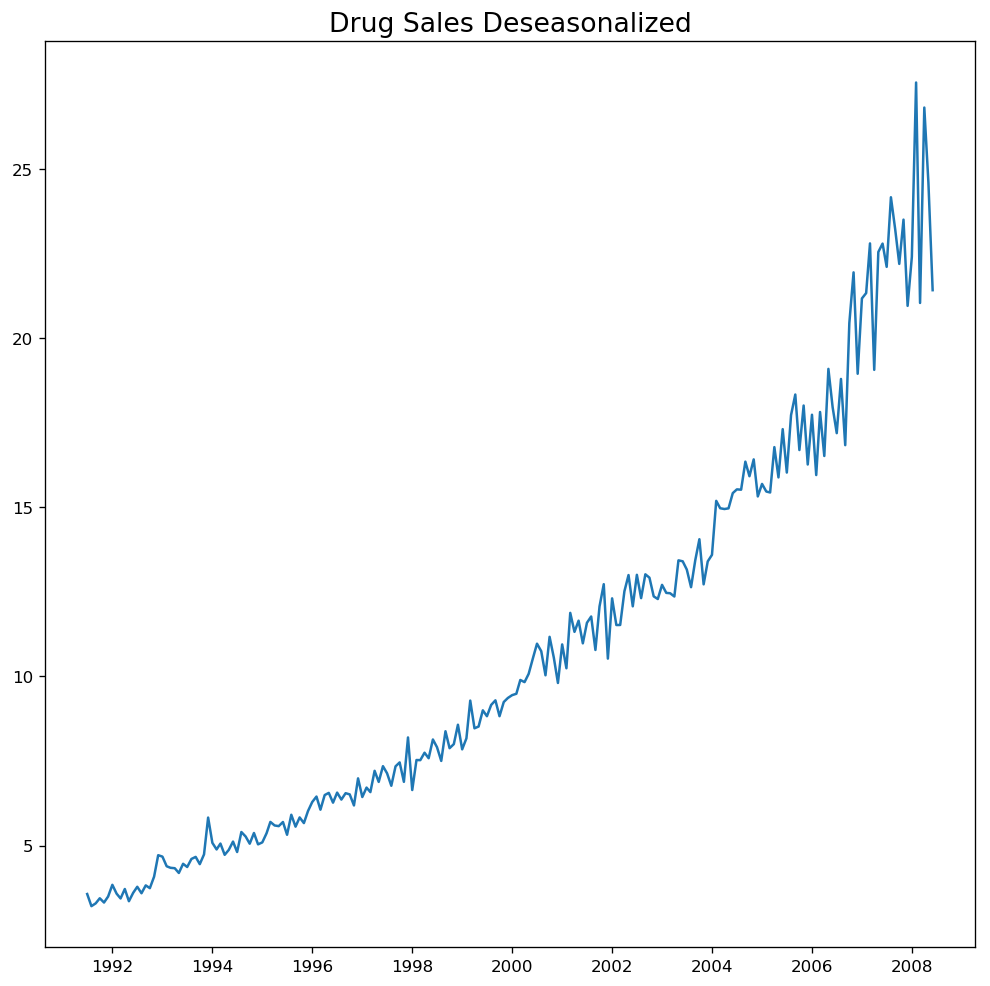

In [48]:
# Deseasonalize
deseasonalized = Aus_Drug_DF.value / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

### Time Series Forecasting in Python

A popular and widely used statistical method for time series forecasting is the ARIMA model.
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. 

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error 
from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

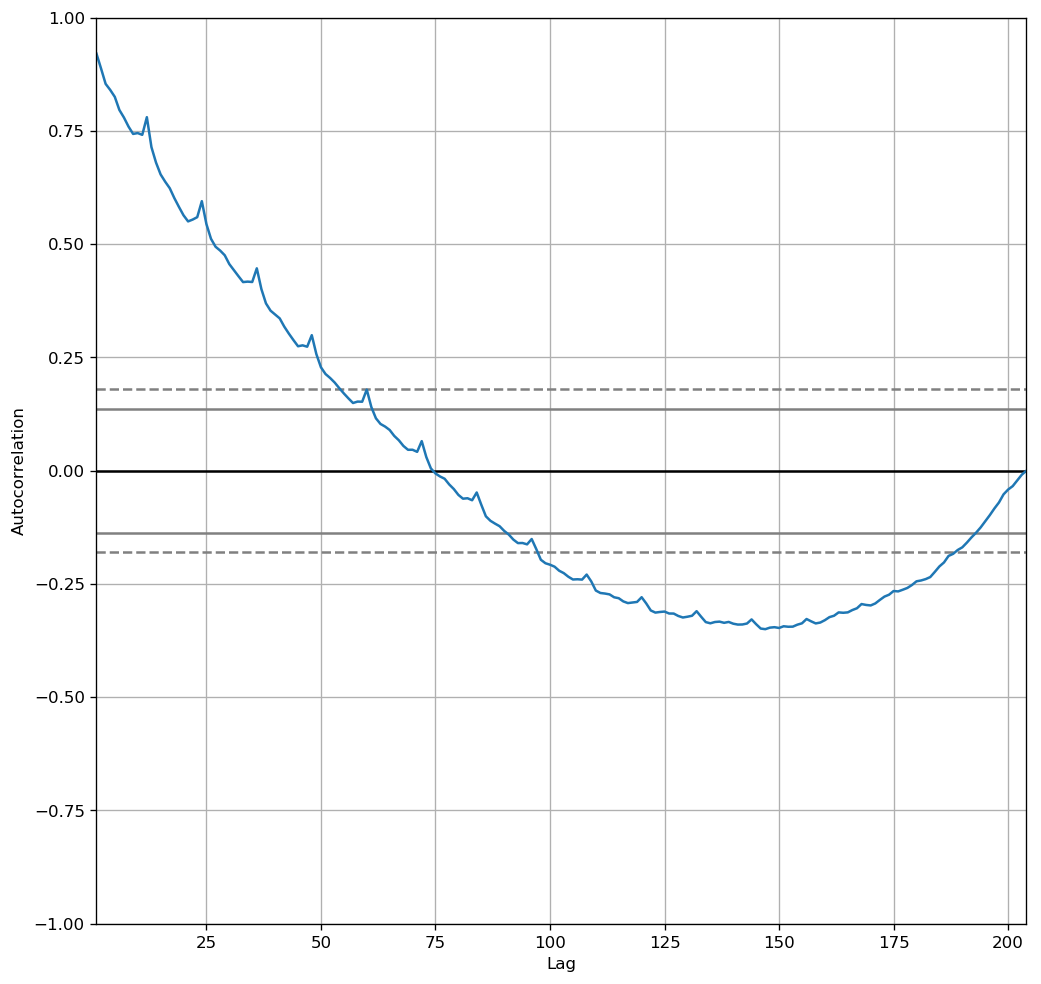

In [52]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(Aus_Drug_DF)

C:\Users\itzpr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -427.792
Method:                       css-mle   S.D. of innovations              1.988
Date:                Thu, 30 May 2019   AIC                            869.583
Time:                        21:53:21   BIC                            892.776
Sample:                    08-01-1991   HQIC                           878.966
                         - 06-01-2008                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0880      0.060      1.476      0.142      -0.029       0.205
ar.L1.D.value    -0.4971      0.071     -7.016      0.000      -0.636      -0.358
ar.L2.D.value    -0.2851      0.077     

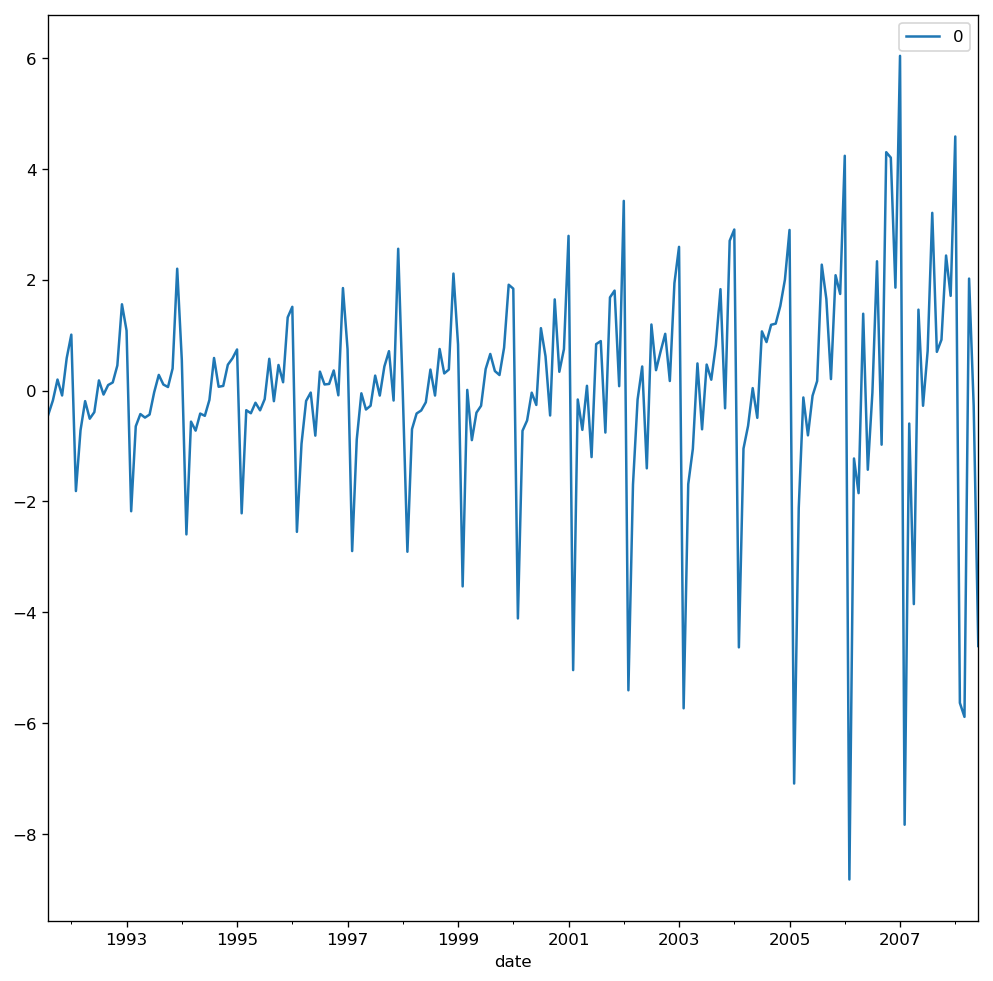

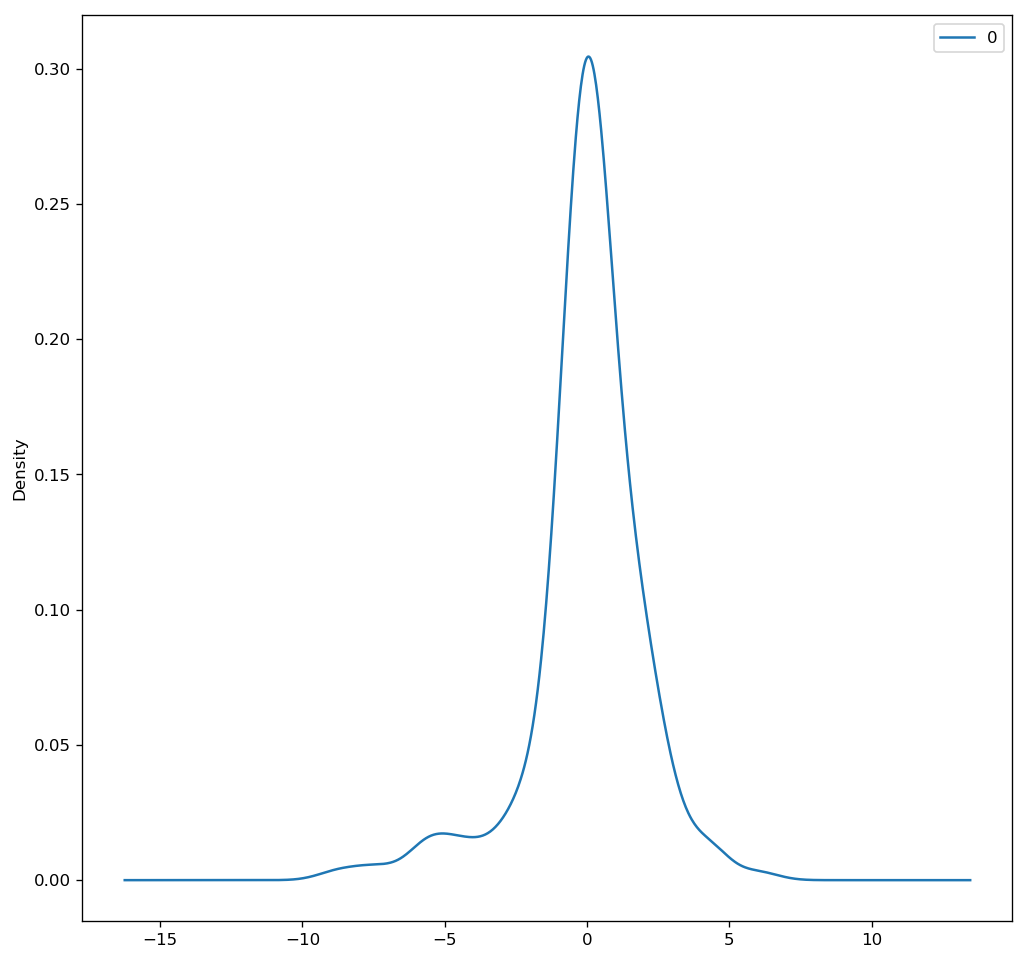

                0
count  203.000000
mean    -0.001294
std      1.993380
min     -8.816105
25%     -0.471509
50%      0.085676
75%      0.833444
max      6.035030


In [54]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(Aus_Drug_DF, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [65]:
predictions

[array([11.80730146]),
 array([12.39679734]),
 array([13.03179072]),
 array([12.95622263]),
 array([14.21763675]),
 array([15.32185896]),
 array([12.52686228]),
 array([12.44205558]),
 array([11.83956856]),
 array([13.19501111]),
 array([12.9938478]),
 array([12.10086728]),
 array([12.25095401]),
 array([12.69424799]),
 array([13.88742148]),
 array([13.57597817]),
 array([15.09943394]),
 array([16.30144482]),
 array([13.85707932]),
 array([14.12214607]),
 array([13.55812315]),
 array([14.73206733]),
 array([14.66800184]),
 array([14.30345482]),
 array([14.74767805]),
 array([15.31765229]),
 array([15.96748838]),
 array([16.7035739]),
 array([17.82400129]),
 array([19.2151732]),
 array([15.36275089]),
 array([15.27278051]),
 array([15.56164088]),
 array([15.98355972]),
 array([16.46384927]),
 array([14.99701429]),
 array([16.35429766]),
 array([17.12490945]),
 array([17.13559832]),
 array([18.35201282]),
 array([19.05806592]),
 array([21.59640532]),
 array([16.65545558]),
 array([16.798

In [55]:
X = Aus_Drug_DF.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=20.285612, expected=12.854748
predicted=15.679599, expected=13.542004
predicted=15.867141, expected=13.287640
predicted=15.346109, expected=15.134918
predicted=14.869252, expected=16.828350
predicted=15.513293, expected=9.800215
predicted=12.026044, expected=10.816994
predicted=11.123571, expected=10.654223
predicted=12.276963, expected=12.512323
predicted=12.558249, expected=12.161210
predicted=11.400689, expected=12.998046
predicted=12.411457, expected=12.517276
predicted=12.473092, expected=13.268658
predicted=13.080743, expected=14.733622
predicted=14.072911, expected=13.669382
predicted=13.823382, expected=16.503966
predicted=15.148785, expected=18.003768
predicted=17.129132, expected=11.938030
predicted=13.713054, expected=12.997900
predicted=13.024262, expected=12.882645
predicted=14.304302, expected=13.943447
predicted=14.179086, expected=13.989472
predicted=13.328590, expected=15.339097
predicted=14.670564, expected=15.370764
predicted=15.024193, expected=16.142005
p

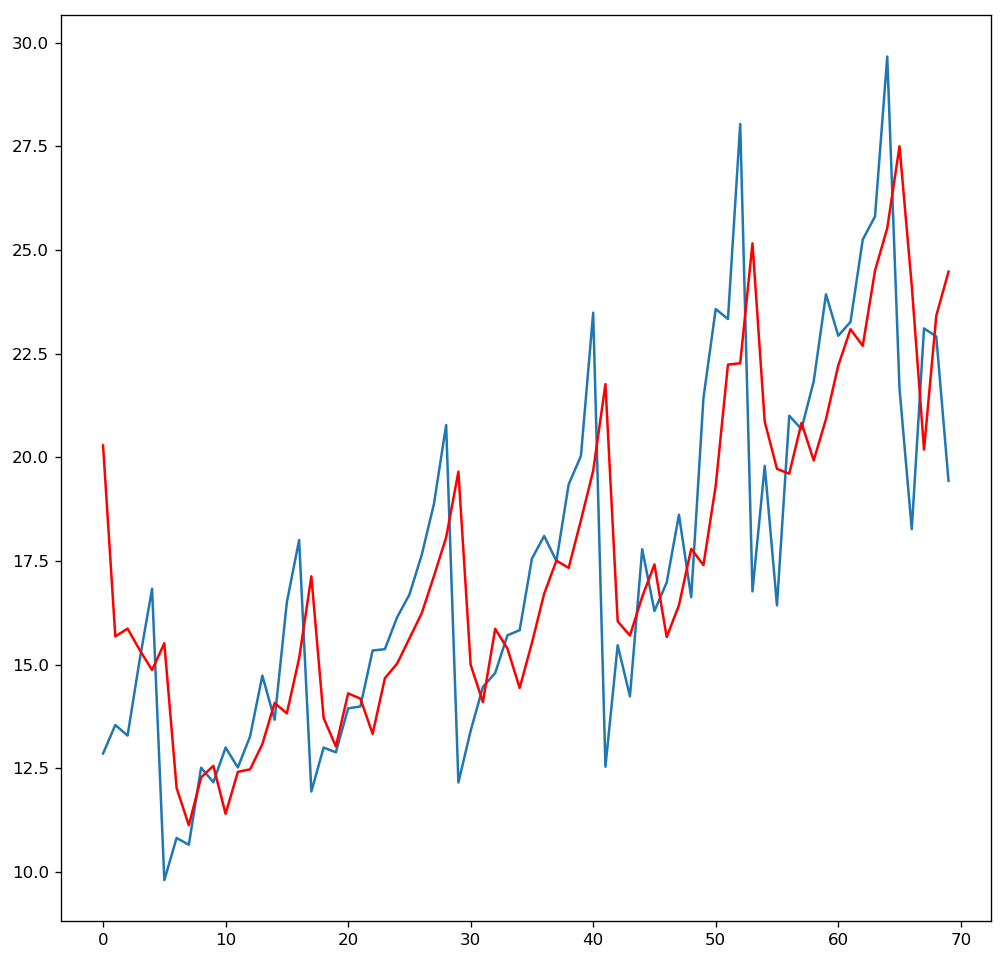

In [66]:
from sklearn.metrics import mean_squared_error
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()